<a href="https://colab.research.google.com/github/seeedata/Dacon/blob/main/%EC%98%A8%EB%9D%BC%EC%9D%B8%20%EC%B1%84%EB%84%90%20%EC%A0%9C%ED%92%88%20%ED%8C%90%EB%A7%A4%EB%9F%89%20%EC%98%88%EC%B8%A1%20AI%20%EC%98%A8%EB%9D%BC%EC%9D%B8%20%ED%95%B4%EC%BB%A4%ED%86%A4/0823%20xgboost%20%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from tqdm import tqdm

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

#전처리된 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LGaimers/xgboost전처리최종.csv')
df

,ID,제품,대분류,중분류,소분류,브랜드,date,count,year,month,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,holiday,id_season_mean,id_season_std
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-01,0,2022,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
1,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-02,0,2022,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
2,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-03,0,2022,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
3,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-04,0,2022,1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
4,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-05,0,2022,1,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,42.6,38.331449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7293505,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,2023-03-31,0,2023,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7293506,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,2023-04-01,0,2023,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7293507,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,2023-04-02,0,2023,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7293508,15889,B002-03799-00010,B002-C001-0002,B002-C002-0004,B002-C003-0020,B002-03799,2023-04-03,0,2023,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293510 entries, 0 to 7293509
Data columns (total 25 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              int64  
 1   제품              object 
 2   대분류             object 
 3   중분류             object 
 4   소분류             object 
 5   브랜드             object 
 6   date            object 
 7   count           int64  
 8   year            int64  
 9   month           int64  
 10  day             int64  
 11  dayofweek_num   int64  
 12  dayofweek_name  object 
 13  season          object 
 14  lag_1           float64
 15  lag_2           float64
 16  lag_3           float64
 17  lag_4           float64
 18  lag_5           float64
 19  lag_6           float64
 20  lag_7           float64
 21  rolling_mean    float64
 22  holiday         float64
 23  id_season_mean  float64
 24  id_season_std   float64
dtypes: float64(11), int64(6), object(8)
memory usage: 1.4+ GB


# date를 datetime으로 변환

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d'); df.head(2)

,ID,제품,대분류,중분류,소분류,브랜드,date,count,year,month,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,holiday,id_season_mean,id_season_std
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-01,0,2022,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
1,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-02,0,2022,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449


#범주형 변수 labelencoding

In [ ]:
df.dtypes

ID                         int64
제품                        object
대분류                       object
중분류                       object
소분류                       object
브랜드                       object
date              datetime64[ns]
count                      int64
year                       int64
month                      int64
day                        int64
dayofweek_num              int64
dayofweek_name            object
season                    object
lag_1                    float64
lag_2                    float64
lag_3                    float64
lag_4                    float64
lag_5                    float64
lag_6                    float64
lag_7                    float64
rolling_mean             float64
holiday                  float64
id_season_mean           float64
id_season_std            float64
dtype: object

In [ ]:
df.columns

Index(['ID', '제품', '대분류', '중분류', '소분류', '브랜드', 'date', 'count', 'year',
       'month', 'day', 'dayofweek_num', 'dayofweek_name', 'season', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'rolling_mean',
       'holiday', 'id_season_mean', 'id_season_std'],
      dtype='object')

In [ ]:
encoding_columns = ['제품', '대분류', '중분류', '소분류', '브랜드',
                    'dayofweek_name', 'season']
not_encoding_columns = ['ID', 'date', 'count', 'year',
       'month', 'day', 'dayofweek_num', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'rolling_mean',
       'holiday', 'id_season_mean', 'id_season_std']

In [ ]:
#encoding 전 원래 값들의 class들을 저장
enc_classes = {}

def encoding_label(x):
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)

    enc_classes[x.name] = le.classes_

    return label

In [ ]:
df1 = df[encoding_columns].apply(encoding_label)
df2 = df[not_encoding_columns]
data = df1.join(df2)
data

,제품,대분류,중분류,소분류,브랜드,dayofweek_name,season,ID,date,count,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,holiday,id_season_mean,id_season_std
0,0,1,6,37,0,2,3,0,2022-01-01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
1,0,1,6,37,0,3,3,0,2022-01-02,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
2,0,1,6,37,0,1,3,0,2022-01-03,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
3,0,1,6,37,0,5,3,0,2022-01-04,0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
4,0,1,6,37,0,6,3,0,2022-01-05,0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,42.6,38.331449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7293505,15839,1,3,19,3169,0,1,15889,2023-03-31,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7293506,15839,1,3,19,3169,2,1,15889,2023-04-01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7293507,15839,1,3,19,3169,3,1,15889,2023-04-02,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7293508,15839,1,3,19,3169,1,1,15889,2023-04-03,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
data.rename(columns={'제품': 'product', '대분류': 'big', '중분류': 'mid',
                     '소분류': 'small', '브랜드': 'brand'}, inplace=True); data.columns

Index(['product', 'big', 'mid', 'small', 'brand', 'dayofweek_name', 'season',
       'ID', 'date', 'count', 'year', 'month', 'day', 'dayofweek_num', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'rolling_mean',
       'holiday', 'id_season_mean', 'id_season_std'],
      dtype='object')

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/LGaimers/xgb전처리데이터_le도완료.csv')

#23년 3월, 23년 4월을 test data로 설정하자

In [ ]:
#23년2월까지가 train 데이터셋
train = data.loc[data['date']<='2023-02-28', :]
#23년 3월부터가 test 데이터셋
test = data.loc[data['date']>='2023-03-01', :]

#train 데이터에서 y, X 분할
y_train = train[['count']]
X_train = train.drop(['count', 'date'], axis=1)
#test 데이터에서 y, X 분할
y_test = test[['count']]
X_test = test.drop(['count', 'date'], axis=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6737360, 23) (6737360, 1)
(556150, 23) (556150, 1)


In [ ]:
#나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
test_origin = test.loc[:, ['date', 'big', 'ID', 'count']]; test_origin.head()

,date,big,ID,count
424,2023-03-01,1,0,0
425,2023-03-02,1,0,0
426,2023-03-03,1,0,0
427,2023-03-04,1,0,0
428,2023-03-05,1,0,0


In [ ]:
X_train.head()

,product,big,mid,small,brand,dayofweek_name,season,ID,year,month,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,holiday,id_season_mean,id_season_std
0,0,1,6,37,0,2,3,0,2022,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
1,0,1,6,37,0,3,3,0,2022,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
2,0,1,6,37,0,1,3,0,2022,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
3,0,1,6,37,0,5,3,0,2022,1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,42.6,38.331449
4,0,1,6,37,0,6,3,0,2022,1,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,42.6,38.331449


In [ ]:
X_test.head()

,product,big,mid,small,brand,dayofweek_name,season,ID,year,month,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,holiday,id_season_mean,id_season_std
424,0,1,6,37,0,6,1,0,2023,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,15.502688
425,0,1,6,37,0,4,1,0,2023,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,15.502688
426,0,1,6,37,0,0,1,0,2023,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,15.502688
427,0,1,6,37,0,2,1,0,2023,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,15.502688
428,0,1,6,37,0,3,1,0,2023,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,15.502688


In [ ]:
y_train.head()

,count
0,0
1,0
2,0
3,0
4,0


In [ ]:
y_test.head()

,count
424,0
425,0
426,0
427,0
428,0


In [ ]:
test_origin.head()

,date,big,ID,count
424,2023-03-01,1,0,0
425,2023-03-02,1,0,0
426,2023-03-03,1,0,0
427,2023-03-04,1,0,0
428,2023-03-05,1,0,0


#학습

In [ ]:
'''
model = xgb.XGBRegressor(n_estimators=10000,  #생성할 트리의 개수
                         eta=0.3,  #학습률. 0~1(0.3)
                         num_boost_around=10,  #학습에 활용될 weak learner의 반복 수(10)
                         min_child_weight=1, #leaf node에 포함되는 최소 관측치의 수. 0~무한대. 작을수록 과적합 가능성 높음(1))
                        max_depth=6,  #트리 최대 깊이. 과적합 조절 용도.0~무한대(6)
                        subsample=1, #학습 시 데이터 샘플링 비율. 과적합 제어.0~1(1)
                        colsample_bytree=1,  #트리 생성에 필요한 feature의 샘플링. 피쳐많을때 과적합 조절. 0~1(1)
                        reg_lambda=1,  #l2규제적용값. 피쳐많을때 적용검토. 클수록 과적합 감소.(1)
                        reg_alpha=0,  #l1규제적용값. 피쳐많을때적용검토. 클수록 과적합 감소.(0)
                        scale_pos_weight=1,  #불균형 데이터셋의 균형을 유지(1)
                        seed=42
)
'''

In [ ]:
xgb_params = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LGaimers/hyperparameter_xgb.csv')

model = XGBRegressor(n_estimators = 10000, eta = xgb_params.iloc[47,1], min_child_weight = xgb_params.iloc[47,2],
                       max_depth = xgb_params.iloc[47,3], colsample_bytree = xgb_params.iloc[47,4],
                       subsample = xgb_params.iloc[47,5], seed=0)

In [ ]:
#eval_set: 모델 훈련 중 검증 세트로 활용할 데이터를 지정
#early_stopping_rounds: 조기 정지를 위한 라운드 수. 성능 향상이 없는 경우, 50라운드 후에 조기 정지 가능
#verbose=False: 모델 훈련 과정의 진행 상황을 출력하지 않음
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=300, verbose=False)

#훈련된 모델의 변수 중요도를 시각화
#height: 막대 그래프의 높이
#plot_importance(model, height=0.9)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
model.get_params()['subsample']

0.9

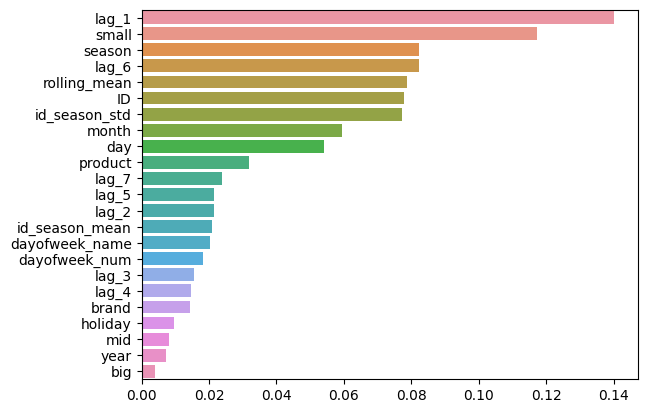

In [ ]:
#배열형태로 반환
importance_values = model.feature_importances_
importance_series = pd.Series(importance_values, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=importance_series, y=importance_series.index)
#plot_importance(model, height=0.9)
plt.show()

<Axes: xlabel='date'>

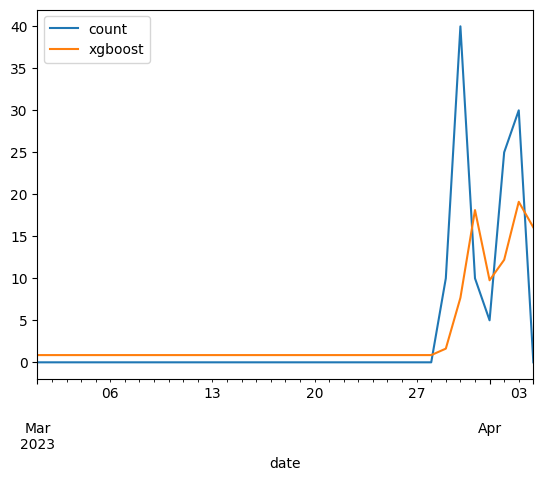

In [ ]:
#테스트 데이터 중 특정 id 데이터를 추출
dft1 = X_test[X_test['ID']==520]

predict_dft1 = model.predict(dft1)

#실제 값과 예측값을 하나의 df로 만들고 시각화
result = pd.concat([test_origin[test_origin['ID']==520].reset_index(),
                    pd.DataFrame(predict_dft1, columns=['xgboost'])], axis=1, ignore_index=False)
result = result.set_index('date')
result = result.loc[:, ['count', 'xgboost']]
result.plot()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

507.4166515059344


#변수 제거

###big 제거

In [ ]:
#23년2월까지가 train 데이터셋
train = data.loc[data['date']<='2023-02-28', :]
#23년 3월부터가 test 데이터셋
test = data.loc[data['date']>='2023-03-01', :]

#train 데이터에서 y, X 분할
y_train = train[['count']]
X_train = train.drop(['count', 'date', 'year'], axis=1)
#test 데이터에서 y, X 분할
y_test = test[['count']]
X_test = test.drop(['count', 'date', 'year'], axis=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6737360, 22) (6737360, 1)
(556150, 22) (556150, 1)


In [ ]:
#나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
test_origin = test.loc[:, ['date', 'big', 'ID', 'count']]; test_origin.head()

,date,big,ID,count
424,2023-03-01,1,0,0
425,2023-03-02,1,0,0
426,2023-03-03,1,0,0
427,2023-03-04,1,0,0
428,2023-03-05,1,0,0


In [ ]:
model = XGBRegressor(n_estimators = 10000, eta = 0.01, min_child_weight = 6,
                       max_depth = 5, colsample_bytree = 0.8,
                       subsample = 0.9, seed=0)

In [ ]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=300, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

544.7829617509351


#목적 함수 변경

일반적으로 사용하는 loss function인 RMSE 대신 새롭게 정의한 Custom Objective Fuction을 사용했다. 이는 과소추정과 과대추정에 대한 차이를 반영하기 위한 것이다. 일반적인 MSE를 변형하여 만약 예측값이 실제값보다 작을 경우 높은 가중치를 주도록 목적함수를 정의했다.

새 목적함수는 residual이 0보다 클 때, 즉 실제값보다 낮게 추정할 때 alpha만큼의 가중치를 곱해 반영합니다. XGBoost를 custom objective function으로 훈련하기 위해선 아래와 같이
gradient(1차 미분함수) / hessian(2차 미분함수)를 정의해 두 값을 return해주어야 합니다.

In [ ]:
#alpha를 argument로 받는 함수로 실제 objective function을 wrapping하여 alpha값을 쉽게 조정할 수 있도록 작성했습니다.
#custom objective function for forcing model not to underestimate
def weighted_mse(alpha = 1):  #alpha 기본값은 1

    def weighted_mse_fixed(label, pred):  #label:실제타겟값

        #잔차 계산
        residual = (label - pred).astype("float")

        grad = np.where(residual>0, -2*alpha*residual, -2*residual)
        hess = np.where(residual>0, 2*alpha, 2.0)
        return grad, hess
    return weighted_mse_fixed

In [ ]:
model = XGBRegressor(n_estimators = 10000, eta = 0.01, min_child_weight = 6,
                       max_depth = 5, colsample_bytree = 0.8,
                       subsample = 0.9, seed=0)

model.set_params(**{'objective': weighted_mse(100)})

model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
        early_stopping_rounds=300, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None,
             objective=<function weighted_mse.<locals>.weighted_mse_fixed at 0x7e0eded1b9a0>, ...)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

695.5774751345459


모델 tuning은 scikit-learn의 GridSearchCV를 활용하여 간단히 튜닝했으며 tuning 범위를 넓게 했을 때 오히려 성능이 떨어지는 것으로 보아 데이터가 작아 overfitting이 쉽게 일어나는 것으로 판단, sparse하게 tuning한 hyperparameter를 사용했다.

과대추정이 과소추정보다 점수가 높음

새 목적함수 적용 여부 추후 결정해야 함

#PSFA

In [ ]:
df_psfa = pd.concat([test_origin.reset_index(drop=True), pd.DataFrame(y_pred, columns=['pred'])], axis=1, ignore_index=False); df_psfa

,date,big,ID,count,pred
0,2023-03-01,1,0,0,8.657691
1,2023-03-02,1,0,0,8.657691
2,2023-03-03,1,0,0,8.657691
3,2023-03-04,1,0,0,8.657691
4,2023-03-05,1,0,0,8.657691
...,...,...,...,...,...
556145,2023-03-31,1,15889,0,8.657691
556146,2023-04-01,1,15889,0,8.657691
556147,2023-04-02,1,15889,0,8.657691
556148,2023-04-03,1,15889,0,8.657691


In [ ]:
pred_sell = df_psfa[['ID', 'pred', 'date']]
#date_mapping = {'2023-03-01 00:00:00': 1, '2023-03-02 00:00:00': 2, '2023-03-03 00:00:00': 3, '2023-03-04 00:00:00': 4, '2023-03-05 00:00:00': 5, '2023-03-06 00:00:00': 6,
#                                      '2023-03-07 00:00:00': 7, '2023-03-08 00:00:00': 8, '2023-03-09 00:00:00': 9, '2023-03-10 00:00:00': 10, '2023-03-11 00:00:00': 11, '2023-03-12 00:00:00': 12,
 #                                     '2023-03-13 00:00:00': 13, '2023-03-14 00:00:00': 14, '2023-03-15 00:00:00': 15, '2023-03-16 00:00:00': 16, '2023-03-17 00:00:00': 17, '2023-03-18 00:00:00': 18,
  #                                    '2023-03-19 00:00:00': 19, '2023-03-20 00:00:00': 20, '2023-03-21 00:00:00': 21, '2023-03-22 00:00:00': 22, '2023-03-23 00:00:00': 23, '2023-03-24 00:00:00': 24,
   #                                   '2023-03-25 00:00:00': 25, '2023-03-26 00:00:00': 26, '2023-03-27 00:00:00': 27, '2023-03-28 00:00:00': 28, '2023-03-29 00:00:00': 29, '2023-03-30 00:00:00': 30,
    #                                  '2023-03-31 00:00:00': 31, '2023-04-01 00:00:00': 32, '2023-04-02 00:00:00': 33, '2023-04-03 00:00:00': 34, '2023-04-04 00:00:00': 35}
#pred_sell['date'] = pred_sell['date'].apply(lambda x: date_mapping.get(x, x))
pred_sell['date'] = pred_sell['date'].dt.date
pred_sell = pd.pivot_table(pred_sell, index='ID', columns='date', values='pred')
pred_sell.reset_index(inplace=True)
pred_sell

date,ID,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,...,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691
1,1,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,...,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691
2,2,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,...,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691
3,3,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,...,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691
4,4,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,...,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,...,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691
15886,15886,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,...,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691
15887,15887,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,...,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691
15888,15888,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,...,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691,8.657691


In [ ]:
true_sell = df_psfa[['ID', 'count', 'date']]
true_sell['date'] = true_sell['date'].dt.date
true_sell = pd.pivot_table(true_sell, index='ID', columns='date', values='count')
true_sell.reset_index(inplace=True)
true_sell

date,ID,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,15887,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
def PSFA(pred_sell, true_sell, train):
    upper_cat = train['big'].unique()
    PSFA = 1
    day_range = df_psfa['date'].dt.date.unique()
    for cat in upper_cat:
        temp_ID_list = train.loc[train['big'] == cat, 'ID'].values
        for day in day_range:
            total_sell = np.sum(true_sell.loc[true_sell['ID'].isin(temp_ID_list), day].values) # day 총 판매량
            pred_values = pred_sell.loc[pred_sell['ID'].isin(temp_ID_list), day].values # 특정일의 예측 판매량
            true_values = true_sell.loc[true_sell['ID'].isin(temp_ID_list), day].values # 특정일 실제 판매량

            # 실제 판매와 예측 판매가 같은 경우 오차가 없는 것으로 간주
            denominator = np.maximum(true_values, pred_values)
            diffs = np.where(denominator!=0, np.abs(true_values - pred_values) / denominator, 0)

            day_sell = true_values.sum(axis=0) # Item별 실제 판매량
            sell_weights = day_sell / total_sell # Item별 day 총 판매량 내 비중
            PSFA -= np.sum(diffs * sell_weights)/(35*len(upper_cat))
            # PSFA_m의 평균이 PSFA이므로,35일 평균 and 대분류별 평균 적용하여 감산
            # PSFA = 1 - (((오차 * 제품비중의 제품별 가중평균)의 일자별 산술 평균)의 대분류별 산술 평균)
    return PSFA

In [ ]:
PSFA(pred_sell, true_sell, df_psfa)

-3059.04448607809